In [4]:
import requests
import pandas as pd
import numpy as np
#from sodapy import Socrata
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
import seaborn as sns
%matplotlib inline

response = requests.get("https://data.bts.gov/resource/w96p-f2qv.json")

In [5]:
print(response.status_code)
json = response.json()

200


In [6]:
df = pd.read_json('https://data.bts.gov/resource/w96p-f2qv.json?$limit=1000')
#print(df)
#df.info()

<AxesSubplot: title={'center': 'trips between 100-200'}, xlabel='date'>

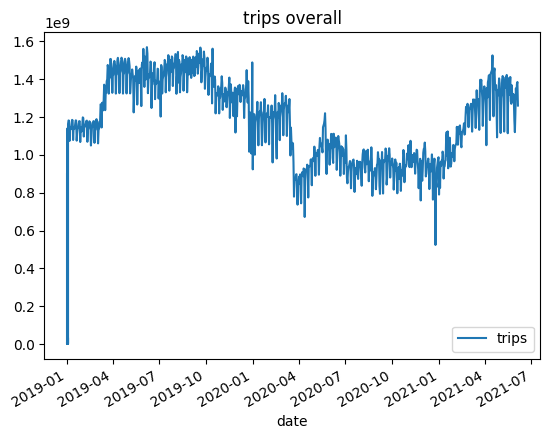

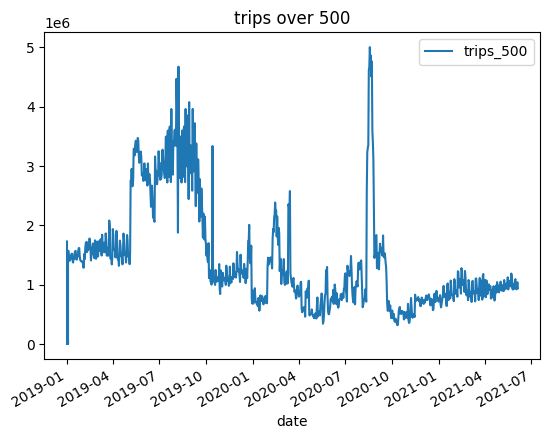

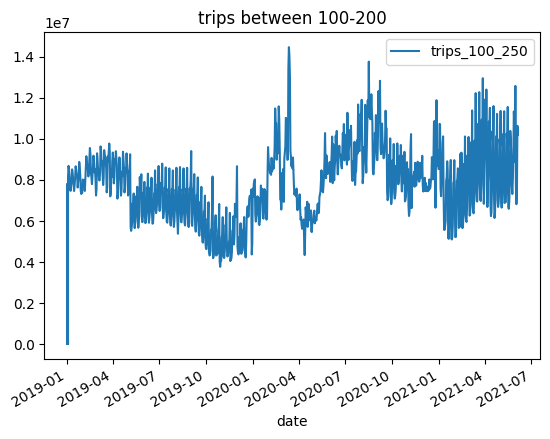

In [7]:
df.plot(x='date',y='trips',kind='line',title='trips overall')
df.plot(x='date',y='trips_500',kind='line',title='trips over 500')
df.plot(x='date',y='trips_100_250',kind='line', title='trips between 100-200')

<AxesSubplot: xlabel='date'>

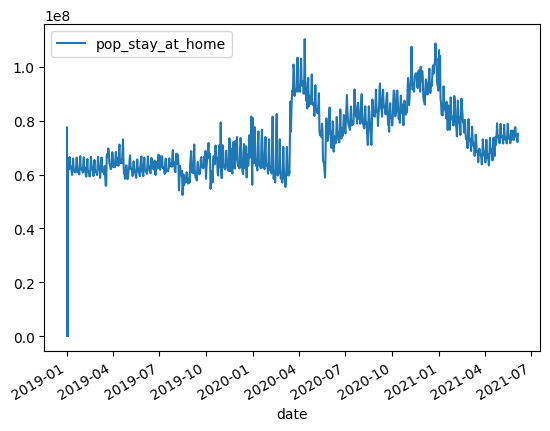

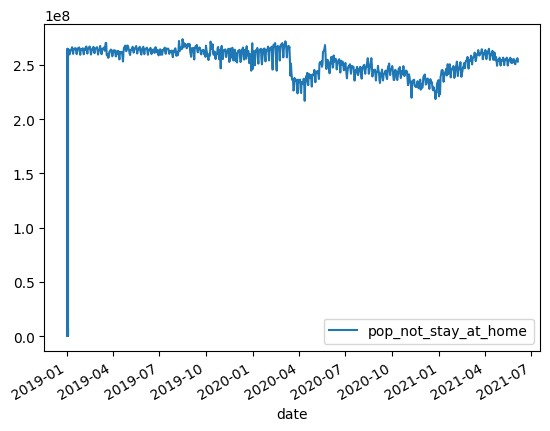

In [8]:
df.plot(x='date',y='pop_stay_at_home',kind='line')
df.plot(x='date',y='pop_not_stay_at_home',kind='line')

In [9]:
airbnb = pd.read_csv("AB_NYC_2019.csv")
airbnb.head(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [10]:
len(airbnb)

48895

In [11]:
#Brooklyn
sub_1=airbnb.loc[airbnb['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=airbnb.loc[airbnb['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=airbnb.loc[airbnb['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=airbnb.loc[airbnb['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

price_list_by_n

[       price
 0        149
 3         89
 6         60
 12        89
 15       140
 ...      ...
 48882     40
 48884    190
 48887    170
 48890     70
 48891     40
 
 [20104 rows x 1 columns],
        price
 1        225
 2        150
 4         80
 5        200
 7         79
 ...      ...
 48886    200
 48888    125
 48892    115
 48893     55
 48894     90
 
 [21661 rows x 1 columns],
        price
 46       130
 77        70
 143      140
 161       79
 181      350
 ...      ...
 48858     68
 48863     93
 48866     58
 48878     45
 48889     65
 
 [5666 rows x 1 columns],
        price
 169       70
 249       36
 250       37
 251       37
 256       36
 ...      ...
 48441     40
 48446    100
 48533    450
 48649     54
 48799    235
 
 [373 rows x 1 columns],
        price
 171       40
 207       45
 260       90
 261      105
 309       90
 ...      ...
 48783    140
 48792     80
 48795    125
 48796     70
 48805    100
 
 [1091 rows x 1 columns]]

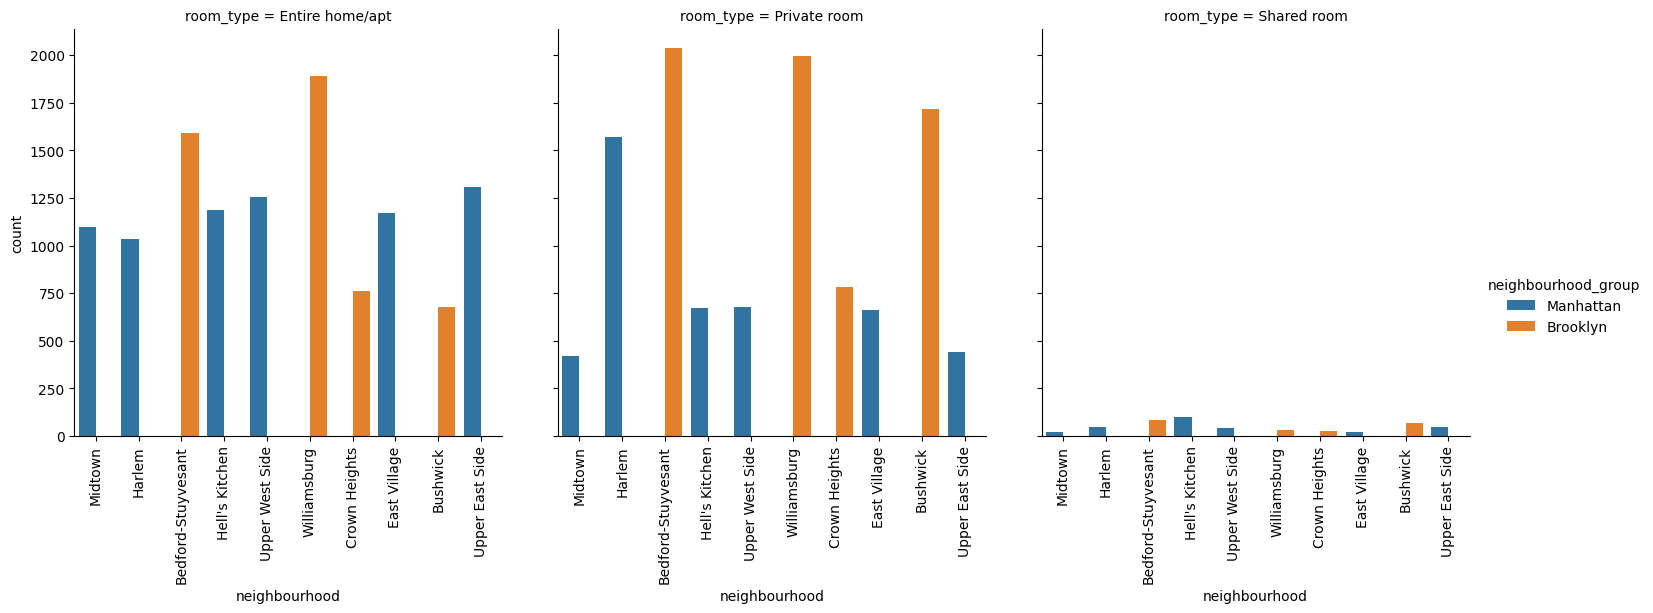

In [12]:
##fin=airbnb19.plot(kind='scatter',x='longitude',y='latitude',label='availability_365',c='price',cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, figsize=(10,8))
#fin.legend()
airbnb.neighbourhood.value_counts().head(10)
sub_7=airbnb.loc[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)

In [13]:
airbnb21 = pd.read_csv("listings.csv")
airbnb21.head(3)

TypeError: read_csv() missing 1 required positional argument: 'filepath_or_buffer'